
#Research topic: Spotify Music Recommendation Based on Personality Traits - Quantum Machine Learning



Mentor:
Prof. Dr. Gerhard Hellstern
Duale Hochschule Baden-Württemberg

Project by:
Eva Shah

The workflow:

This Model is designed to recommend songs from Spotify to users based on their preferences.

1. IMPORTS AND INSTALLATIONS:
*   The notebook installs necessary imports such as scikit-learn, classiq etc.


2. LOADING DATA:
* The dataset is downloaded as CSV file from source: https://github.com/orzanai/Moodify/tree/main/Datasets
* The file containes relevant data for song features and labels for the 4 different moods.


3. DATA PREPARATION:
* Features are selected for model training
* Data is separated into training, testing and prediction sets


4. DIMENSTIONALITY REDUCTION:
* Principle Component Analysis is used to reduce dimenstionality of the data to make it easier for the QSVM to process.


5. STANDARD SCALER:
* Features are standardized using ```StandardScaler```


6. SCALING OF DATA:
* Data is scaled to range ([-π, π])

7. LABEL PREP:
* Labels are converted to NumPy arrays


8. FEATURE MAPPING:
* Second order Pauli-Z evolution encoding circuit is created for feature mapping.


9. CONSTRUCTING THE QSVM:
* QSVM is constructed using Classiq's ```construct_qsvm_model``` function


10. SYNTHESIS AND EXECUTION:
* Model is synthesized using Classiq's ```synthesis``` function and executed using the ```execute``` function.


11. OBTAINING RESULTS AND IMPLEMENTING A RECOMMEND FUNCTION:
* Results are obtained by checking the accuracy of the QSVM.
* Then a recommendation function retrieves and suggests songs that were classified under the chosen emotional category by the QSVM, providing personalized music selections based on user preferences. This approach enhances music exploration by automating tailored recommendations through quantum-enhanced classification techniques.

12. CREATING A CLASSICAL SVM AND IMPLEMENTED A RECOMMEND FUNCTION:
* A classical SVM is created using sklearn.svm's ```SVC``` function. The SVM uses a polynomial, linear, radial basis function and sigmoid kernel for comparison.
* Then a similar recommendation function as that of the QSVM is implemented to get recommendations based on the results of the classical SVM

In [ ]:
! pip install scikit-learn
! pip install seaborn

In [ ]:
# General Imports
# Visualisation Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scikit Imports
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [ ]:
## For TSNE visualisation
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

import matplotlib
import matplotlib.colors as colors

# We'll use matplotlib for graphics.
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt

# We import seaborn to make nice plots.
try:
    import seaborn as sns
except ModuleNotFoundError:
    palette = np.array(
        [
            (0.4, 0.7607843137254902, 0.6470588235294118),
            (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
            (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
            (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
            (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
            (1.0, 0.8509803921568627, 0.1843137254901961),
            (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
            (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
        ]
    )
else:
    sns.set_style("darkgrid")
    sns.set_palette("muted")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    palette = np.array(sns.color_palette("Set2"))

import warnings

warnings.filterwarnings("ignore")

In [ ]:
! pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.5/401.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12.1
    Uninstalling sympy-1.12.1:
      Successf

In [ ]:
## Classiq imports
import classiq
classiq.authenticate()
from classiq import Pauli, construct_qsvm_model, execute, show, synthesize
from classiq.applications.qsvm import QSVMFeatureMapEntanglement

Your user code: FMVH-JDDJ
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=FMVH-JDDJ


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/CSV/1200_song_mapped.csv"
kaggle_full_set = pd.read_csv(path, header=0)
kaggle_full_set.head()

,Unnamed: 0,track,artist,duration (ms),popularity,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,labels
0,0,1999,Prince,379266,68,spotify:track:2H7PHVdQ3mXqEHXcvclTB0,0.866,0.730,5,-8.201,0.0767,0.13700,0.000000,0.0843,0.625,118.523,4,1
1,1,23,Blonde Redhead,318800,43,spotify:track:4HIwL9ii9CcXpTOTzMq0MP,0.381,0.832,8,-5.069,0.0492,0.01890,0.196000,0.1530,0.166,120.255,4,0
2,2,9 Crimes,Damien Rice,217946,60,spotify:track:5GZEeowhvSieFDiR8fQ2im,0.346,0.139,0,-15.326,0.0321,0.91300,0.000077,0.0934,0.116,136.168,4,0
3,3,99 Luftballons,Nena,233000,2,spotify:track:6HA97v4wEGQ5TUClRM0XLc,0.466,0.438,4,-12.858,0.0608,0.08900,0.000006,0.1130,0.587,193.100,4,1
4,4,A Boy Brushed Red Living In Black And White,Underoath,268000,60,spotify:track:47IWLfIKOKhFnz1FUEUIkE,0.419,0.932,1,-3.604,0.1060,0.00171,0.000000,0.1370,0.445,169.881,4,2


In [ ]:
kaggle_full = kaggle_full_set.drop(columns = 'Unnamed: 0')
kaggle_full = kaggle_full.drop(columns=['track', 'artist', 'uri'])
kaggle_full.head()

,duration (ms),popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,labels
0,379266,68,0.866,0.730,5,-8.201,0.0767,0.13700,0.000000,0.0843,0.625,118.523,4,1
1,318800,43,0.381,0.832,8,-5.069,0.0492,0.01890,0.196000,0.1530,0.166,120.255,4,0
2,217946,60,0.346,0.139,0,-15.326,0.0321,0.91300,0.000077,0.0934,0.116,136.168,4,0
3,233000,2,0.466,0.438,4,-12.858,0.0608,0.08900,0.000006,0.1130,0.587,193.100,4,1
4,268000,60,0.419,0.932,1,-3.604,0.1060,0.00171,0.000000,0.1370,0.445,169.881,4,2


In [ ]:
TRAIN_SAD_SIZE = 30
TRAIN_HAPPY_SIZE = 30
TRAIN_ENERGETIC_SIZE = 30
TRAIN_CALM_SIZE = 30

TEST_SAD_SIZE = 30
TEST_HAPPY_SIZE = 30
TEST_ENERGETIC_SIZE = 30
TEST_CALM_SIZE = 30

PREDICT_SAD_SIZE = 20
PREDICT_HAPPY_SIZE = 20
PREDICT_ENERGETIC_SIZE = 20
PREDICT_CALM_SIZE = 20

SHUFFLE_DATA = False

In [ ]:
## Seperating sad, happy, energetic, calm from eachother:
all_sad_set = kaggle_full.loc[kaggle_full['labels'] == 0]
all_happy_set = kaggle_full.loc[kaggle_full['labels'] == 1]
all_energetic_set = kaggle_full.loc[kaggle_full['labels'] == 2]
all_calm_set = kaggle_full.loc[kaggle_full['labels'] == 3]

In [ ]:
## shuffle data before selective sets
if SHUFFLE_DATA:
    all_sad_set = shuffle(all_sad_set, random_state=1234)
    all_happy_set = shuffle(all_happy_set, random_state=1234)
    all_energetic_set = shuffle(all_energetic_set, random_state=1234)
    all_calm_set = shuffle(all_calm_set, random_state=1234)

In [ ]:
## Selecting data subsets
selected_training_set = pd.concat(
    [all_sad_set[:TRAIN_SAD_SIZE], all_happy_set[:TRAIN_HAPPY_SIZE],
    all_energetic_set[:TRAIN_ENERGETIC_SIZE], all_calm_set[:TRAIN_CALM_SIZE]]
)
selected_testing_set = pd.concat(
    [all_sad_set[:TEST_SAD_SIZE], all_happy_set[:TEST_HAPPY_SIZE],
    all_energetic_set[:TEST_ENERGETIC_SIZE], all_calm_set[:TEST_CALM_SIZE]]
)

selected_prediction_set = pd.concat(
    [
        all_sad_set[
            TRAIN_SAD_SIZE
            + TEST_SAD_SIZE : TRAIN_SAD_SIZE
            + TEST_SAD_SIZE
            + PREDICT_SAD_SIZE
        ],
        all_happy_set[
            TRAIN_HAPPY_SIZE
            + TEST_HAPPY_SIZE : TRAIN_HAPPY_SIZE
            + TEST_HAPPY_SIZE
            + PREDICT_HAPPY_SIZE
        ],
        all_energetic_set[
            TRAIN_ENERGETIC_SIZE
            + TEST_ENERGETIC_SIZE : TRAIN_ENERGETIC_SIZE
            + TEST_ENERGETIC_SIZE
            + PREDICT_ENERGETIC_SIZE
        ],
        all_calm_set[
            TRAIN_CALM_SIZE
            + TEST_CALM_SIZE : TRAIN_CALM_SIZE
            + TEST_CALM_SIZE
            + PREDICT_CALM_SIZE
        ]
    ]
)

selected_training_set.head()

,duration (ms),popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature,labels
1,318800,43,0.381,0.832,8,-5.069,0.0492,0.018900,0.196000,0.1530,0.166,120.255,4,0
2,217946,60,0.346,0.139,0,-15.326,0.0321,0.913000,0.000077,0.0934,0.116,136.168,4,0
17,210626,0,0.402,0.750,2,-7.358,0.0293,0.000012,0.959000,0.1220,0.580,149.941,4,0
18,231893,0,0.279,0.423,4,-12.060,0.0380,0.009570,0.837000,0.1280,0.291,101.571,4,0
20,306600,29,0.189,0.427,0,-9.080,0.0449,0.113000,0.092300,0.0580,0.158,187.212,3,0


In [ ]:
## Seperating relevant features data from label data

kaggle_headers = list(kaggle_full.columns.values)  # all headers
feature_cols = kaggle_headers[0:-1]  # excluding label headers
label_col = kaggle_headers[-1]  # marking label header as label

selected_training_data = selected_training_set.loc[:, feature_cols]
selected_training_labels = selected_training_set.loc[:, label_col]

selected_testing_data = selected_testing_set.loc[:, feature_cols]
selected_testing_labels = selected_testing_set.loc[:, label_col]

selected_prediction_data = selected_prediction_set.loc[:, feature_cols]
selected_prediction_true_labels = selected_prediction_set.loc[:, label_col]

print(selected_training_data.columns)
selected_testing_data.head()

Index(['duration (ms)', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time signature'],
      dtype='object')


,duration (ms),popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time signature
1,318800,43,0.381,0.832,8,-5.069,0.0492,0.018900,0.196000,0.1530,0.166,120.255,4
2,217946,60,0.346,0.139,0,-15.326,0.0321,0.913000,0.000077,0.0934,0.116,136.168,4
17,210626,0,0.402,0.750,2,-7.358,0.0293,0.000012,0.959000,0.1220,0.580,149.941,4
18,231893,0,0.279,0.423,4,-12.060,0.0380,0.009570,0.837000,0.1280,0.291,101.571,4
20,306600,29,0.189,0.427,0,-9.080,0.0449,0.113000,0.092300,0.0580,0.158,187.212,3


In [ ]:
def scatter(x, colors):
    # Check if there are enough data points for each color
    for i in range(4):
        if np.sum(colors == i) < 2:
            raise ValueError(f"Not enough data points for color {i}.")

    # Calculate median values for each label
    medians = [np.median(x[colors == i, :2], axis=0) for i in range(4)]

    # Create scatter plot and add labels
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect="equal")
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, c=palette[colors.astype(np.int32)])
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.axis("off")
    ax.axis("tight")

    # Add labels for each digit
    labels = ["SAD", "HAPPY", "ENERGETIC", "CALM"]
    for i in range(4):
        # Position of each label
        xtext, ytext = medians[i]
        txt = ax.text(xtext, ytext, labels[i], fontsize=10)
        txt.set_path_effects(
            [PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()]
        )

    plt.show()


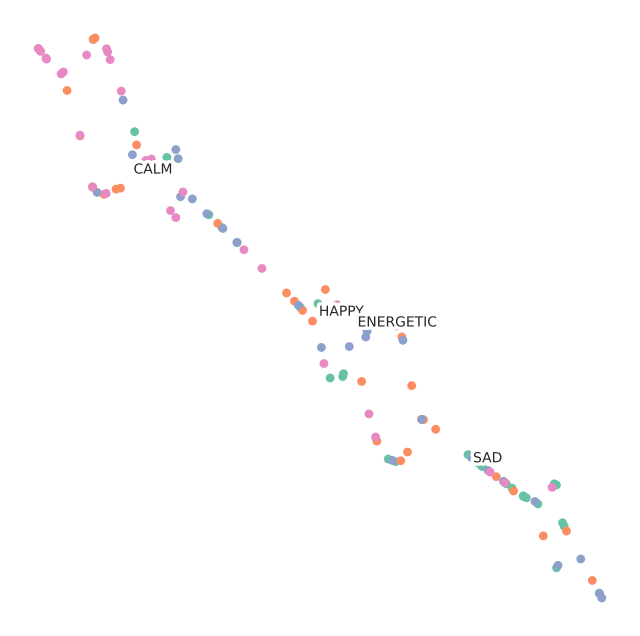

In [ ]:
proj = TSNE(random_state=RS).fit_transform(selected_training_data)
scatter(proj, selected_training_labels)

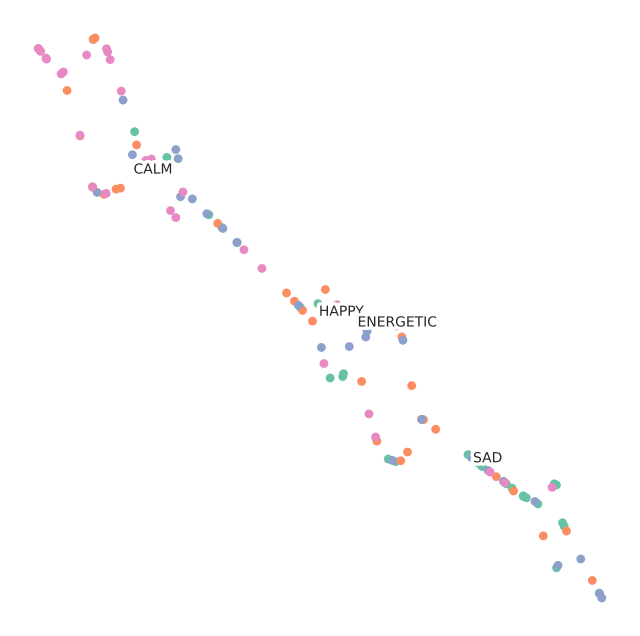

In [ ]:
proj = TSNE(random_state=RS).fit_transform(selected_testing_data)
scatter(proj, selected_testing_labels)

In [ ]:
N_DIM = 4
sample_train = selected_training_data.values.tolist()
sample_test = selected_testing_data.values.tolist()
sample_predict = selected_prediction_data.values.tolist()

# Reduce dimensions

pca = PCA(n_components=N_DIM).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)
sample_predict = pca.transform(sample_predict)

In [ ]:
std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)
sample_predict = std_scale.transform(sample_predict)

In [ ]:
samples = np.append(sample_train, sample_test, axis=0)
samples = np.append(samples, sample_predict, axis=0)
minmax_scale = MinMaxScaler((-np.pi, np.pi)).fit(samples)
EMOTION_TRAIN_DATA = minmax_scale.transform(sample_train)
EMOTION_TEST_DATA = minmax_scale.transform(sample_test)
EMOTION_PREDICT_DATA = minmax_scale.transform(sample_predict)

In [ ]:
EMOTION_TRAIN_LABELS = np.array(selected_training_labels.values.tolist())
EMOTION_TEST_LABELS = np.array(selected_testing_labels.values.tolist())

In [ ]:
pauli_zz_feature_map_function_name = "pauli_feature_map"
pauli_zz_kwargs = {
    "paulis": [[Pauli.Z], [Pauli.Z, Pauli.Z]],
    "entanglement": QSVMFeatureMapEntanglement.FULL,
    "alpha": 2,
    "reps": 2,
    "feature_dimension": N_DIM,
}

In [ ]:
QSVM_EMOTION_PAULI_ZZ = construct_qsvm_model(
    train_data=EMOTION_TRAIN_DATA.tolist(),
    train_labels=EMOTION_TRAIN_LABELS.tolist(),
    test_data=EMOTION_TEST_DATA.tolist(),
    test_labels=EMOTION_TEST_LABELS.tolist(),
    predict_data=EMOTION_PREDICT_DATA.tolist(),
    feature_map_function_name=pauli_zz_feature_map_function_name,
    **pauli_zz_kwargs,
)

In [ ]:
from classiq import write_qmod

write_qmod(QSVM_EMOTION_PAULI_ZZ, "EMOTION")

In [ ]:
qprog = synthesize(QSVM_EMOTION_PAULI_ZZ)
show(qprog)

Opening: https://platform.classiq.io/circuit/0ec1b69a-4308-47e7-9508-91279d594e6f?version=0.42.2


In [ ]:
%%time
results = execute(qprog).result()
print(
    "quantum kernel classification test score:  %0.2f"
    % (results[0].value["test_score"])
)
print("Results:", results)

quantum kernel classification test score:  0.96
Results: [TaggedUnstructured(value_type=<SavedResultValueType.Unstructured: 'Unstructured'>, name='qsvm_results', value={'test_score': 0.9583333333333334, 'predicted_labels': [2, 3, 2, 0, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 2, 0, 3, 2, 1, 0, 0, 0, 2, 1, 2, 2, 3, 0, 3, 3, 2, 1, 3, 3, 1, 2, 2, 3, 2, 1, 3, 0, 0, 1, 3, 1, 2, 1, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 3, 1, 3, 0, 2, 3, 3, 2, 1, 1, 1, 0]})]
CPU times: user 2.59 s, sys: 238 ms, total: 2.83 s
Wall time: 5min 31s


In [ ]:
def recommend(emotion_label, pca, std_scale, minmax_scale, qprog, kaggle_full_set):
    # Map emotion labels to emotion names
    emotion_map = {0: 'Sad', 1: 'Happy', 2: 'Energetic', 3: 'Calm'}

    # Select the prediction set based on the specified emotion label
    prediction_set = kaggle_full_set[kaggle_full_set['labels'] == emotion_label]

    # Extract features and preprocess the prediction set
    feature_cols = ['duration (ms)', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time signature']  # Replace with your actual feature names

    # Get the indices of the songs in the prediction set
    prediction_indices = prediction_set.index

    prediction_data = prediction_set[feature_cols]
    prediction_data_pca = pca.transform(prediction_data)
    prediction_data_std = std_scale.transform(prediction_data_pca)
    prediction_data_scaled = minmax_scale.transform(prediction_data_std)

    # Predict using QSVM model
    predictions = predict_qsvm_model(qprog, prediction_data_scaled)

    # Filter recommended songs based on predicted emotion label
    predicted_indices = np.where(predictions == emotion_label)[0]
    recommended_tracks = prediction_set.iloc[predicted_indices]['track'].values.tolist()
    recommended_artists = prediction_set.iloc[predicted_indices]['artist'].values.tolist()

    # Combine track names and artist names into tuples
    recommended_songs = []
    for track, artist in zip(recommended_tracks, recommended_artists):
        recommended_songs.append(f"\033[1m{track}\033[0m by \033[1m{artist}\033[0m")

    return emotion_map[emotion_label], recommended_songs
# Example usage of the recommend function
emotion_label = 3
emotion_name, recommended_songs = recommend(emotion_label, pca, std_scale, minmax_scale, qprog, kaggle_full_set)

print(f"Recommended songs for the emotion {emotion_name}:")
for song in recommended_songs:
    print(song)


Recommended songs for the emotion Calm:
A La Plage by Ron Adelaar
After The Rain by Comet Blue
Bayybe 07 by Bilo 503
Beekweide by Job Roggeveen
City Lights by Marlies du Mosch
Collapse Into Light by Evin Iris
Den inre skogen by Thomas Jackson
Drifting by Eroded Sky
Eagle by Ansatz Der Maschine
Escaping Time by Benjamin Martins
Essential Attitudes by Peals
Fields Of Blossom by Martèn LeGrand
Flowing by Lucas Delphy
Frozen by Ron Adelaar
If You Believe by Yonder Dale
Inside* by Ton Snijders
Isonoe by Job Roggeveen
Kaolnite by Burgundy Skies
Keep Going by Mark Milan


In [ ]:
%%time
classical_kernels = ["linear", "poly", "rbf", "sigmoid"]

for ckernel in classical_kernels:
    classical_svc = SVC(kernel=ckernel)
    classical_svc.fit(EMOTION_TRAIN_DATA, EMOTION_TRAIN_LABELS)
    classical_score = classical_svc.score(
        EMOTION_TEST_DATA, np.array(EMOTION_TEST_LABELS.tolist())
    )

    print("%s kernel classification test score:  %0.2f" % (ckernel, classical_score))

linear kernel classification test score:  0.67
poly kernel classification test score:  0.74
rbf kernel classification test score:  0.77
sigmoid kernel classification test score:  0.53
CPU times: user 26.7 ms, sys: 810 µs, total: 27.5 ms
Wall time: 74.8 ms


In [ ]:
def recommend(emotion_label, pca, std_scale, minmax_scale, classical_svc, kaggle_full_set):
    # Map emotion labels to emotion names
    emotion_map = {0: 'Sad', 1: 'Happy', 2: 'Energetic', 3: 'Calm'}

    # Select the prediction set based on the specified emotion label
    prediction_set = kaggle_full_set[kaggle_full_set['labels'] == emotion_label]

    # Extract features and preprocess the prediction set
    feature_cols = ['duration (ms)', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time signature']  # Replace with your actual feature names

    # Get the indices of the songs in the prediction set
    prediction_indices = prediction_set.index

    # Use these indices to extract the relevant data
    prediction_data = prediction_set[feature_cols]
    prediction_data_pca = pca.transform(prediction_data)
    prediction_data_std = std_scale.transform(prediction_data_pca)
    prediction_data_scaled = minmax_scale.transform(prediction_data_std)

    # Predict using the classical SVM model
    predictions = classical_svc.predict(prediction_data_scaled)

    # Filter recommended songs based on predicted emotion label
    predicted_indices = np.where(predictions == emotion_label)[0]
    recommended_tracks = prediction_set.iloc[predicted_indices]['track'].values.tolist()
    recommended_artists = prediction_set.iloc[predicted_indices]['artist'].values.tolist()

    # Combine track names and artist names into tuples
    recommended_songs = []
    for track, artist in zip(recommended_tracks, recommended_artists):
        recommended_songs.append(f"\033[1m{track}\033[0m by \033[1m{artist}\033[0m")

    return emotion_map[emotion_label], recommended_songs
# Example usage of the recommend function
emotion_label = 0
emotion_name, recommended_songs = recommend(emotion_label, pca, std_scale, minmax_scale, classical_svc, kaggle_full_set)

print(f"Recommended songs for the emotion {emotion_name}:")
for song in recommended_songs:
    print(song)


Recommended songs for the emotion Sad:
23 by Blonde Redhead
9 Crimes by Damien Rice
Algo Rhythm by One Sentence. Supervisor
Alison by Slowdive
All I Want by Kodaline
All of Me by John Legend
Anchor by Novo Amor
Andromeda by Weyes Blood
Angel's Song by Arlo Parks
Ashes to Ashes by Warpaint
Bad Kingdom by May
Bad Timing by Arlo Day
Ballad of the Dying Man by Father John Misty
Be My Mistake by The 1975
Before You Go by Lewis Capaldi
Better Than Today by Rhys Lewis
Bird by Billie Marten
Bison on the Plains by Grandaddy
Black Car by Beach House
Bloodbuzz Ohio by SOAK
Bloom Innocent by Fink
Breathe Me by Sia
Bruises by Lewis Capaldi
Chariot by Beach House
Cold Arms by Mumford & Sons
Consequences by Camila Cabello
Conversation by Lucy Rose
Cursive by Billie Marten
Dancing On My Own by Calum Scott
Dancing With Your Ghost by Sasha Sloan
Dark Side of the Gym by The National
Dive by The Soft Cavalry
Don’t Delete The Kisses by Wolf Alice
Dust On The Ground by Bombay Bicycle Club
Easily by Bruno Ma